<a href="https://colab.research.google.com/github/BrendaChepkoech/Swahili-News-Classification-Zindi-Challange/blob/main/Swahili_News_Classification_Zindi_Challange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ZERO TO HERO SWAHILI NEWS CLASSIFICATION USING NLP

##Business Understanding

Swahili is spoken by 100-150 million people across East Africa. In Tanzania, it is one of two national languages (the other is English) and it is the official language of instruction in all schools. News in Swahili is an important part of the media sphere in Tanzania.

News contributes to education, technology, and the economic growth of a country, and news in local languages plays an important cultural role in many Africa countries. In the modern age, African languages in news and other spheres are at risk of being lost as English becomes the dominant language in online spaces.

## Objective 

The objective of this hackathon is to develop a multi-class classification model to classify news content according to their specific categories specified.The model can be used by Swahili online news platforms to automatically group news according to their categories and help readers find the specific news they want to read. In addition, the model will contribute to a body of work ensuring that Swahili is represented in apps and other online products in the future.

## Defining the Metric for Success

The creation of a model that can classify news content according to their specific categories specified. The F1 score for the model should be above 80% in predicting which category the news belongs

## Recording the Experimental Design

1. Loading libraries
2. Loading data
3. Reading data
4. Cleaning data
5. EDA
6. Feature Eng and Preprocessing
7. Modeling 
8. Optimization and model evaluation 
9. Conclusions and recommedations


## Dataset

The dataset was obtained from zindi website

https://zindi.africa/competitions/swahili-news-classification/data

## Data Exploration

In [76]:
#Importing our libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import re
import string
from wordcloud import WordCloud
warnings.filterwarnings('ignore')



In [77]:
#reading the csv files 
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

In [78]:
#Checking the first 10 rows of train
train.head(5)

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [79]:
#Then the first 10 of test
test.head(5)

,swahili_id,content
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,"MKUU wa Wilaya ya Bahi, Mkoani Dodoma, Mwanah..."
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,"MWISHONI mwa wiki hii, Timu ya Soka ya Taifa,..."
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,THAMANI ya mauzo ya bidhaa za Afrika Masharik...
3,00868eeee349e286303706ef0ffd851f39708d37,MENEJA Mawasiliano na Utetezi wa asasi ya AGP...
4,00a5cb12d3058dcf2e42f277eee599992db32412,"WAZIRI wa Kilimo, Japhet Hasunga amesema seri..."


In [80]:
#How is our train shape
train.shape

(5151, 3)

In [81]:
#Same thing with the test file
test.shape

(1288, 2)

In [82]:
#Finding out what type of data we have
train.dtypes

id          object
content     object
category    object
dtype: object

In [83]:
#Lets see how the categories are distributed
train['category'].unique()

array(['Kitaifa', 'Biashara', 'michezo', 'Kimataifa', 'Burudani'],
      dtype=object)

## Data Cleaning

In [84]:
#creating a copy of the train dataset
df = train.copy()
df.head(2)

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara


In [85]:
#Removing links 
df["clean_content"] = df["content"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
df[['content','clean_content']].iloc[9]

content           Mshindi wa mchezo utakaozikutanisha Tottenham...
clean_content    Mshindi wa mchezo utakaozikutanisha Tottenham ...
Name: 9, dtype: object

In [86]:
#Changing all the letter to lower case
df['clean_content'] = df.content.map(lambda x: x.lower())
train.head()

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [87]:
#Removing the punctuation marks
df['clean_content'] = df['clean_content'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
df['clean_content'] = df['clean_content'].str.replace('user','')
df['clean_content']

0        serikali imesema haitakuwa tayari kuona amani...
1        mkuu wa mkoa wa tabora aggrey mwanri amesitis...
2        serikali imetoa miezi sita kwa taasisi zote z...
3        kampuni ya mchezo wa kubahatisha ya mbet imei...
4        watanzania wamekumbushwa kusherehekea sikukuu...
                              ...                        
5146     rais john magufuli ameendelea kung’ara katika...
5147     kampeni inayohimiza watafi ti kuandika upya h...
5148     matukio mapya ya malaria kwa kila watu 1000 k...
5149     imeelezwa kuwa hakuna sheria yoyote inayokata...
5150     akizungumza mara baada ya kutiwa saini kwa ma...
Name: clean_content, Length: 5151, dtype: object

In [88]:
#Checking how the bottom of the dataframe looks after
df.head(5)

,id,content,category,clean_content
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,serikali imesema haitakuwa tayari kuona amani...
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,mkuu wa mkoa wa tabora aggrey mwanri amesitis...
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,serikali imetoa miezi sita kwa taasisi zote z...
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,kampuni ya mchezo wa kubahatisha ya mbet imei...
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,watanzania wamekumbushwa kusherehekea sikukuu...


## Begin Tokenization

*Tokening* is the break down of words into its constituents e.g kampuni, serikali, imetoa

Installing NoelNLP package
This is a package used for stemming words and removing swahili stop words

In [91]:
pip install NoelNLP

In [92]:
from NoelNLP import stopList
stop_words= stopList()
print(stop_words)

['na', 'lakini', 'ingawa', 'ingawaje', 'kwa', 'sababu', 'hadi', 'hata', 'kama', 'ambapo', 'ambamo', 'ambako', 'ambacho', 'ambao', 'ambaye', 'ilhali', 'ya', 'yake', 'yao', 'yangu', 'yetu', 'yenu', 'vya', 'vyao', 'vyake', 'vyangu', 'vyenu', 'vyetu', 'yako', 'hizo', 'mimi', 'sisi', 'wewe', 'nyinyi', 'yeye', 'wao', 'nao', 'nasi', 'nanyi', 'ni', 'alikuwa', 'atakuwa', 'hii', 'hizi', 'zile', 'ile', 'hivi', 'vile', 'za', 'zake', 'zao', 'zenu', 'kwenye', 'katika', 'kwao', 'kwenu', 'kwetu', 'dhidi', 'kati', 'miongoni', 'katikati', 'wakati', 'kabla', 'baada', 'baadaye', 'nje', 'tena', 'mbali', 'halafu', 'hapa', 'pale', 'mara', 'yoyote', 'wowote', 'chochote', 'vyovyote', 'yeyote', 'lolote', 'mwenye', 'mwenyewe', 'lenyewe', 'lenye', 'wote', 'lote', 'vyote', 'nyote', 'kila', 'zaidi', 'hapana', 'ndiyo', 'au', 'ama', 'sio', 'siye', 'tu', 'budi', 'nyingi', 'nyingine', 'wengine', 'mwingine', 'zingine', 'lingine', 'kingine', 'chote', 'sasa', 'basi', 'bila', 'cha', 'chini', 'hapo', 'huku', 'kule', 'humu',

In [93]:
# to remove stop words
df['clean_content'] = df['clean_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [94]:
df.head(5)


,id,content,category,clean_content
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,serikali imesema haitakuwa tayari kuona amani ...
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,mkuu mkoa tabora aggrey mwanri amesitisha liki...
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,serikali imetoa miezi sita taasisi zote umma a...
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,kampuni mchezo kubahatisha mbet imeingia makub...
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,watanzania wamekumbushwa kusherehekea sikukuu ...


In [95]:
# Applying the tokenization
#import nltk
#from nltk.corpus import stopwords
#nltk.download('stopwords')
#sw_nltk = stopwords.words('english')
#print(sw_nltk)


In [96]:
#Importing word tokenizer to tokenize our words into individual words 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
df['clean_content'] = df['clean_content'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [97]:
#I chose to Lemmatize due to the nature of our analysis, the benefit of 
#lemmetization is that it converts the words into there base format. 
#Runs, Ran, Running are all converted to Run which is prefarable 
# to stemming which leaves thw words in an incomplete state
#https://www.baeldung.com/cs/stemming-vs-lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
df['clean_content'] = df['clean_content'].apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens])
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,content,category,clean_content
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,"[serikali, imesema, haitakuwa, tayari, kuona, ..."
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,"[mkuu, mkoa, tabora, aggrey, mwanri, amesitish..."
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,"[serikali, imetoa, miezi, sita, taasisi, zote,..."
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,"[kampuni, mchezo, kubahatisha, mbet, imeingia,..."
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,"[watanzania, wamekumbushwa, kusherehekea, siku..."
...,...,...,...,...
5146,SW993,RAIS John Magufuli ameendelea kung’ara katika...,Kitaifa,"[rais, john, magufuli, ameendelea, kung, ’, ar..."
5147,SW994,KAMPENI inayohimiza watafi ti kuandika upya h...,Kitaifa,"[kampeni, inayohimiza, watafi, ti, kuandika, u..."
5148,SW996,"MATUKIO mapya ya malaria kwa kila watu 1,000 ...",Kitaifa,"[matukio, mapya, malaria, 1000, jamii, yamepun..."
5149,SW997,IMEELEZWA kuwa hakuna sheria yoyote inayokata...,Kitaifa,"[imeelezwa, hakuna, sheria, inayokataza, taari..."


In [98]:
#Checking the number of classes

df['category'].value_counts()

Kitaifa      2000
michezo      1720
Biashara     1360
Kimataifa      54
Burudani       17
Name: category, dtype: int64

In [99]:
# creating a mapping dictionary that maps the category values from 0 to 5
category_mapping = {"Kitaifa": 0,"michezo": 1,"Biashara": 2,"Kimataifa": 3,"Burudani": 4}

df["category"] = df.category.map(category_mapping)

df.sample(5)

,id,content,category,clean_content
2700,SW4043,HABARI Njema kwa mshambuliaji wa timu ya soka...,1,"[habari, njema, mshambuliaji, timu, soka, taif..."
3655,SW5098,Mwakyembe aliyasema hayo jana alipokutana na ...,1,"[mwakyembe, aliyasema, hayo, jana, alipokutana..."
4751,SW633,WATU 64 wanashikiliwa na Jeshi la Polisi mkoa...,0,"[64, wanashikiliwa, jeshi, polisi, mkoani, dod..."
1263,SW2421,"Daktari wa Azam FC, Mwanandi Mwankemwa amesem...",1,"[daktari, azam, fc, mwanandi, mwankemwa, amese..."
5141,SW988,"[""Mshindi mara mbili wa michuano ya Olimpiki C...",1,"[mshindi, mbili, michuano, olimpiki, caster, s..."


In [100]:
# another option:
# mapping categorical values
# categorical_mapping = {"kitaifa":0,"michezo":1, "burudani":2 , "kimataifa":3, "uchumi":4, "afya":5}
# train['category'] = train.category.map(categorical_mapping)
# train.head()

In [101]:
#Creating a copy of test dataset
df1=test.copy()
df1.head(5)

,swahili_id,content
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,"MKUU wa Wilaya ya Bahi, Mkoani Dodoma, Mwanah..."
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,"MWISHONI mwa wiki hii, Timu ya Soka ya Taifa,..."
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,THAMANI ya mauzo ya bidhaa za Afrika Masharik...
3,00868eeee349e286303706ef0ffd851f39708d37,MENEJA Mawasiliano na Utetezi wa asasi ya AGP...
4,00a5cb12d3058dcf2e42f277eee599992db32412,"WAZIRI wa Kilimo, Japhet Hasunga amesema seri..."


In [102]:
# test dataset preprocessing
#Removing links 
df1['clean_content'] = df1["content"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))

#Changing all the letter to lower case
df1['clean_content'] = df1.content.map(lambda x: x.lower())

#Removing the punctuation
df1['clean_content'] = df1['clean_content'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
df1['clean_content'] = df1['clean_content'].str.replace('user','')

# to remove stop words
df1['clean_content'] = df1['clean_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# to tokenize
df1['clean_content'] =df1['clean_content'].apply(lambda x:str(x).split()) 

# to normalize the data using lemmatization
df1['clean_content'] = df1['clean_content'].apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens])
df1.head()

,swahili_id,content,clean_content
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,"MKUU wa Wilaya ya Bahi, Mkoani Dodoma, Mwanah...","[mkuu, wilaya, bahi, mkoani, dodoma, mwanahami..."
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,"MWISHONI mwa wiki hii, Timu ya Soka ya Taifa,...","[mwishoni, wiki, timu, soka, taifa, taifa, sta..."
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,THAMANI ya mauzo ya bidhaa za Afrika Masharik...,"[thamani, mauzo, bidhaa, afrika, mashariki, um..."
3,00868eeee349e286303706ef0ffd851f39708d37,MENEJA Mawasiliano na Utetezi wa asasi ya AGP...,"[meneja, mawasiliano, utetezi, asasi, agpahi, ..."
4,00a5cb12d3058dcf2e42f277eee599992db32412,"WAZIRI wa Kilimo, Japhet Hasunga amesema seri...","[waziri, kilimo, japhet, hasunga, amesema, ser..."


## Exploratory Data Analysis

## Univariate analysis

In [103]:
#a copy of train dataset to be used for eda
df_eda=train.copy()
df_eda.head(5)

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


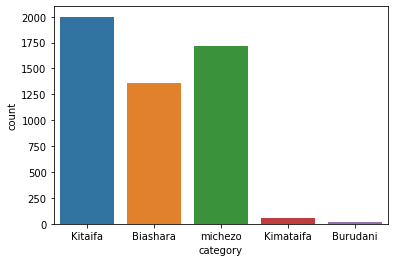

In [104]:
# Count plot of label column(0-Non hateful, 1-hateful)
sb.countplot(df_eda['category'])

In [105]:
#Calculating the percentage distribution of each label
df_eda['category'].value_counts()

Kitaifa      2000
michezo      1720
Biashara     1360
Kimataifa      54
Burudani       17
Name: category, dtype: int64

In [106]:
# Most commom words
from collections import Counter

In [107]:
# Decided to tokenize the clean text column using the string split function to get word frequencies
import nltk
from nltk.tokenize import word_tokenize 

#df_eda["clean_content"] = df_eda["clean_content"].apply(nltk.word_tokenize)
df["clean_content"] =df["clean_content"].apply(lambda x:str(x).split()) 
top = Counter([item for sublist in df["clean_content"] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')

,Common_words,count
0,"'“',",7338
1,"'mwaka',",6580
2,"'”',",6277
3,"'serikali',",5810
4,"'tanzania',",5012
5,"'timu',",4395
6,"'nchi',",4289
7,"'hilo',",4135
8,"'nchini',",4078
9,"'hayo',",3675


In [108]:
#Importing our graph libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [109]:
#A bar graph of the most common words in our texts
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [110]:
#Making a tree of the most common words
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [111]:
# Plot wordcloud image using WordCloud
#hero.wordcloud(df.content, max_words=100)

## Data Modeling

In [112]:

#Importing our Modelling libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(max_features=12000)
# TF-IDF feature matrix
df['clean_content'] = df['clean_content'].apply(lambda x: ' '.join(x))

X = tf_idf.fit_transform(df['clean_content'])
X

<5151x12000 sparse matrix of type '<class 'numpy.float64'>'
	with 598639 stored elements in Compressed Sparse Row format>

In [113]:
#converting it to an array
X = X.toarray()

In [114]:
#Importing our Modelling libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [115]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.2, random_state=69)

## 1. Multinomial Naive Bayes Classifier

In [116]:
#Building the first model

modelNB = MultinomialNB().fit(X_train, y_train)
predicted = modelNB.predict(X_test)
report = classification_report( y_test, predicted )
print(report)
acc=accuracy_score(y_test,predicted)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       415
           1       0.96      0.91      0.93       331
           2       0.76      0.72      0.74       268
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         5

    accuracy                           0.82      1031
   macro avg       0.49      0.49      0.49      1031
weighted avg       0.81      0.82      0.81      1031



In [117]:
tf_idf = TfidfVectorizer(max_features=12000)
# TF-IDF feature matrix
df1['clean_content'] = df1['clean_content'].apply(lambda x: ' '.join(x))

b = tf_idf.fit_transform(df1['clean_content'] )
b

<1288x12000 sparse matrix of type '<class 'numpy.float64'>'
	with 152950 stored elements in Compressed Sparse Row format>

In [118]:
b = b.toarray()

In [119]:
#Making predictions 

y_pred=modelNB.predict(b)
y_pred

array([1, 2, 0, ..., 2, 0, 0])

In [120]:
#Converting the predictions to a dataframe
output = pd.DataFrame({'swahili_id': df1.swahili_id	,'category': y_pred})
output.head(3)

# a mapping dictionary that maps the category values from 0 to 5 back to the categories
category_mapping = {0:"Kitaifa",1:"michezo", 2:"Biashara", 3:"Kimataifa", 4:"Burudani"}

output["category"] = output.category.map(category_mapping)

output.sample(5)
output.to_csv('submission.csv', index=False)


In [121]:
#Previewing the submission file
pd.read_csv('/content/submission.csv')

,swahili_id,category
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,michezo
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,Biashara
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,Kitaifa
3,00868eeee349e286303706ef0ffd851f39708d37,Biashara
4,00a5cb12d3058dcf2e42f277eee599992db32412,Kitaifa
...,...,...
1283,feb4b0ae88524c9cee3e50f2301d84a235f3c607,Kitaifa
1284,fecf3f14f47237e02721ed4baa4eb6c11abd239f,Biashara
1285,feed09e13586d12139cd59bc20996a4d29706606,Biashara
1286,ffc0bca6fde8fa0cce1ac3a7b0d746603d441bf8,Kitaifa


In [122]:
#Previewing the shape of the prediction
output.shape

(1288, 2)

In [123]:
output.isnull().sum()

swahili_id    0
category      0
dtype: int64